# **Exploratory Data Analysis**

## **1.0 Import Libraries**

In [4]:
# For Data Manipulation
import pandas as pd
import numpy as np
# For Data Visualization
import matplotlib.pyplot as plt
# For Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
# AdFuller test
from statsmodels.tsa.stattools import adfuller
# ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## **2.0 Load Dataset**

In [5]:
# Load Dataset
df=pd.read_csv("../Data/eth_usdt_data.csv")

## **3.0 Data Exploration**

- **Sneak Peek of Dataset**

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984


In [7]:
df.tail()

,Date,Open,High,Low,Close,Volume
2712,2025-04-13,1643.501099,1648.286743,1564.838867,1596.685791,13909890792
2713,2025-04-14,1596.881836,1689.857544,1596.086548,1622.769897,16518325094
2714,2025-04-15,1622.771851,1659.836182,1585.229126,1588.632446,13175452875
2715,2025-04-16,1589.031006,1610.782104,1540.033813,1578.105347,15339621551
2716,2025-04-17,1578.014160,1615.306885,1564.195679,1582.548340,11312160796


- **shape of dataset**

In [8]:
df.shape

(2717, 6)

- **info of dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2717 non-null   object 
 1   Open    2717 non-null   float64
 2   High    2717 non-null   float64
 3   Low     2717 non-null   float64
 4   Close   2717 non-null   float64
 5   Volume  2717 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 127.5+ KB


In [10]:
# Making sure the date column is in datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

- **Descriptive Statistics**

In [11]:
df.describe()

,Open,High,Low,Close,Volume
count,2717.000000,2717.000000,2717.000000,2717.000000,2.717000e+03
mean,1531.271334,1573.125254,1484.705437,1531.576171,1.340120e+10
std,1225.489302,1257.947990,1188.736026,1225.006998,1.082743e+10
min,84.279694,85.342743,82.829887,84.308296,6.217330e+08
25%,284.380920,293.921143,275.210999,284.217499,5.804676e+09
50%,1542.954346,1579.162231,1498.771240,1546.438232,1.096275e+10
75%,2464.782227,2542.144775,2381.450684,2466.961426,1.810228e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,9.245355e+10


In [12]:
df.index.min(), df.index.max()

(Timestamp('2017-11-09 00:00:00'), Timestamp('2025-04-17 00:00:00'))

In [13]:
# Checking Duplicates
df.duplicated().any()

np.False_

- **Checking closing price**

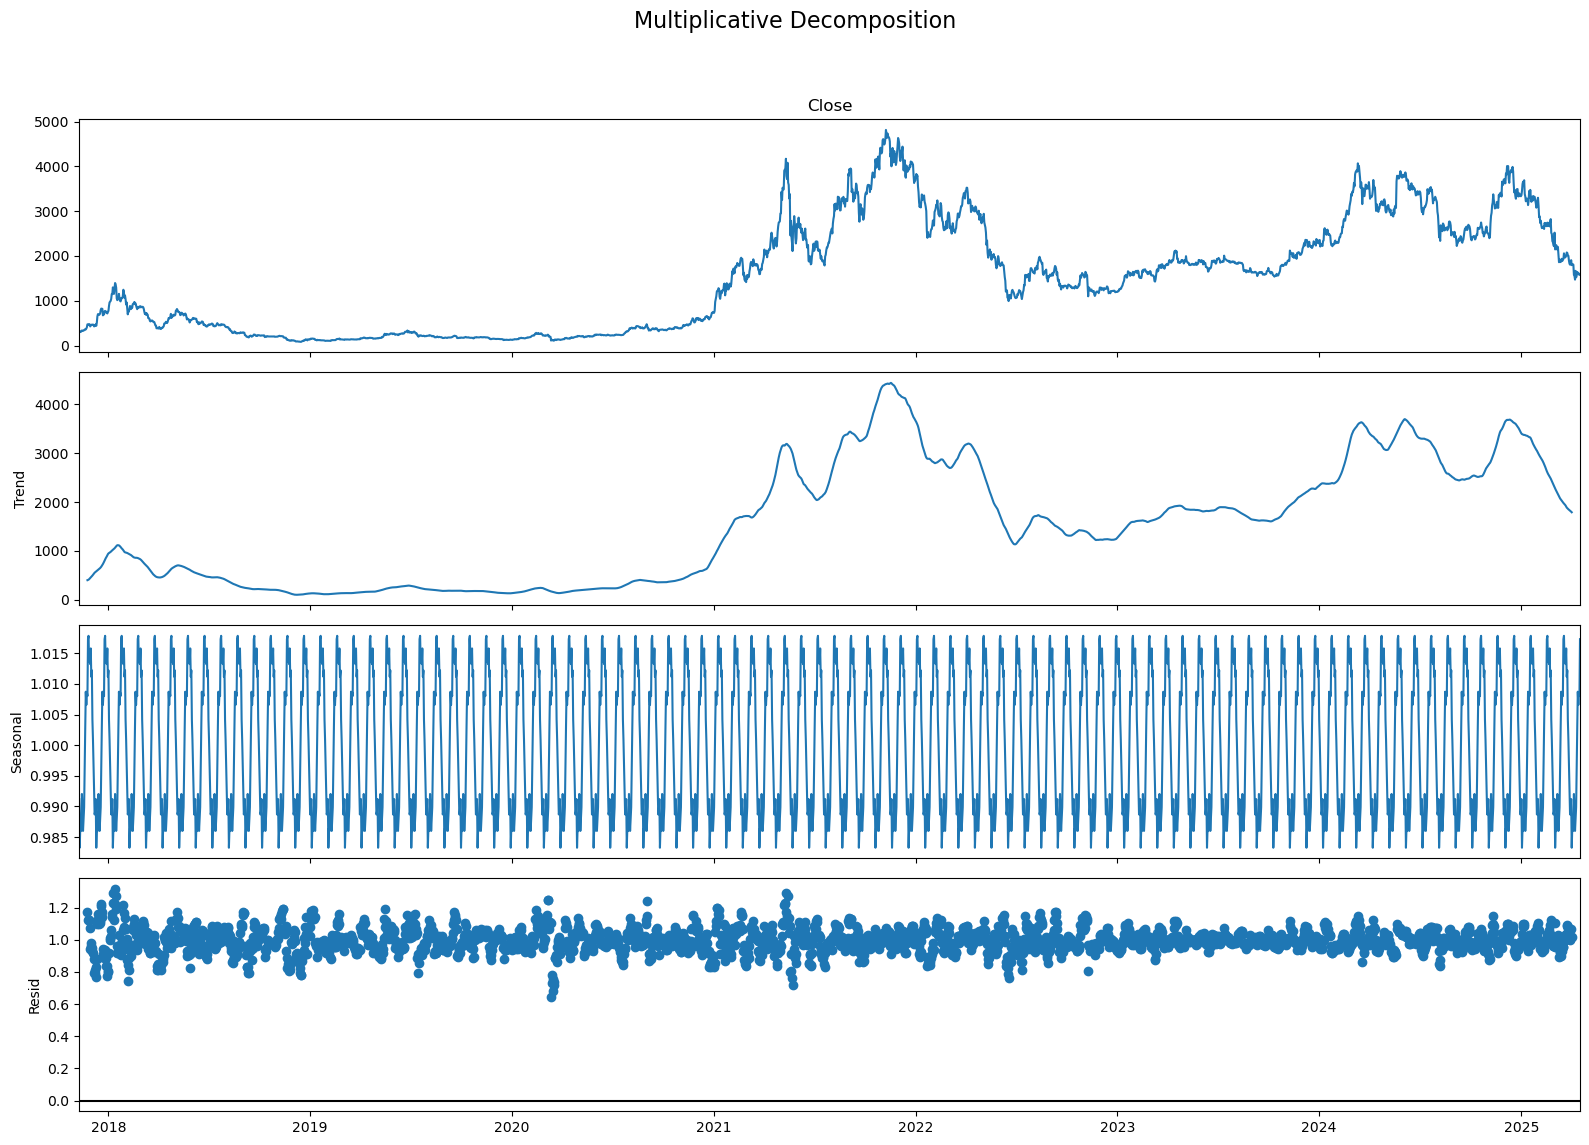

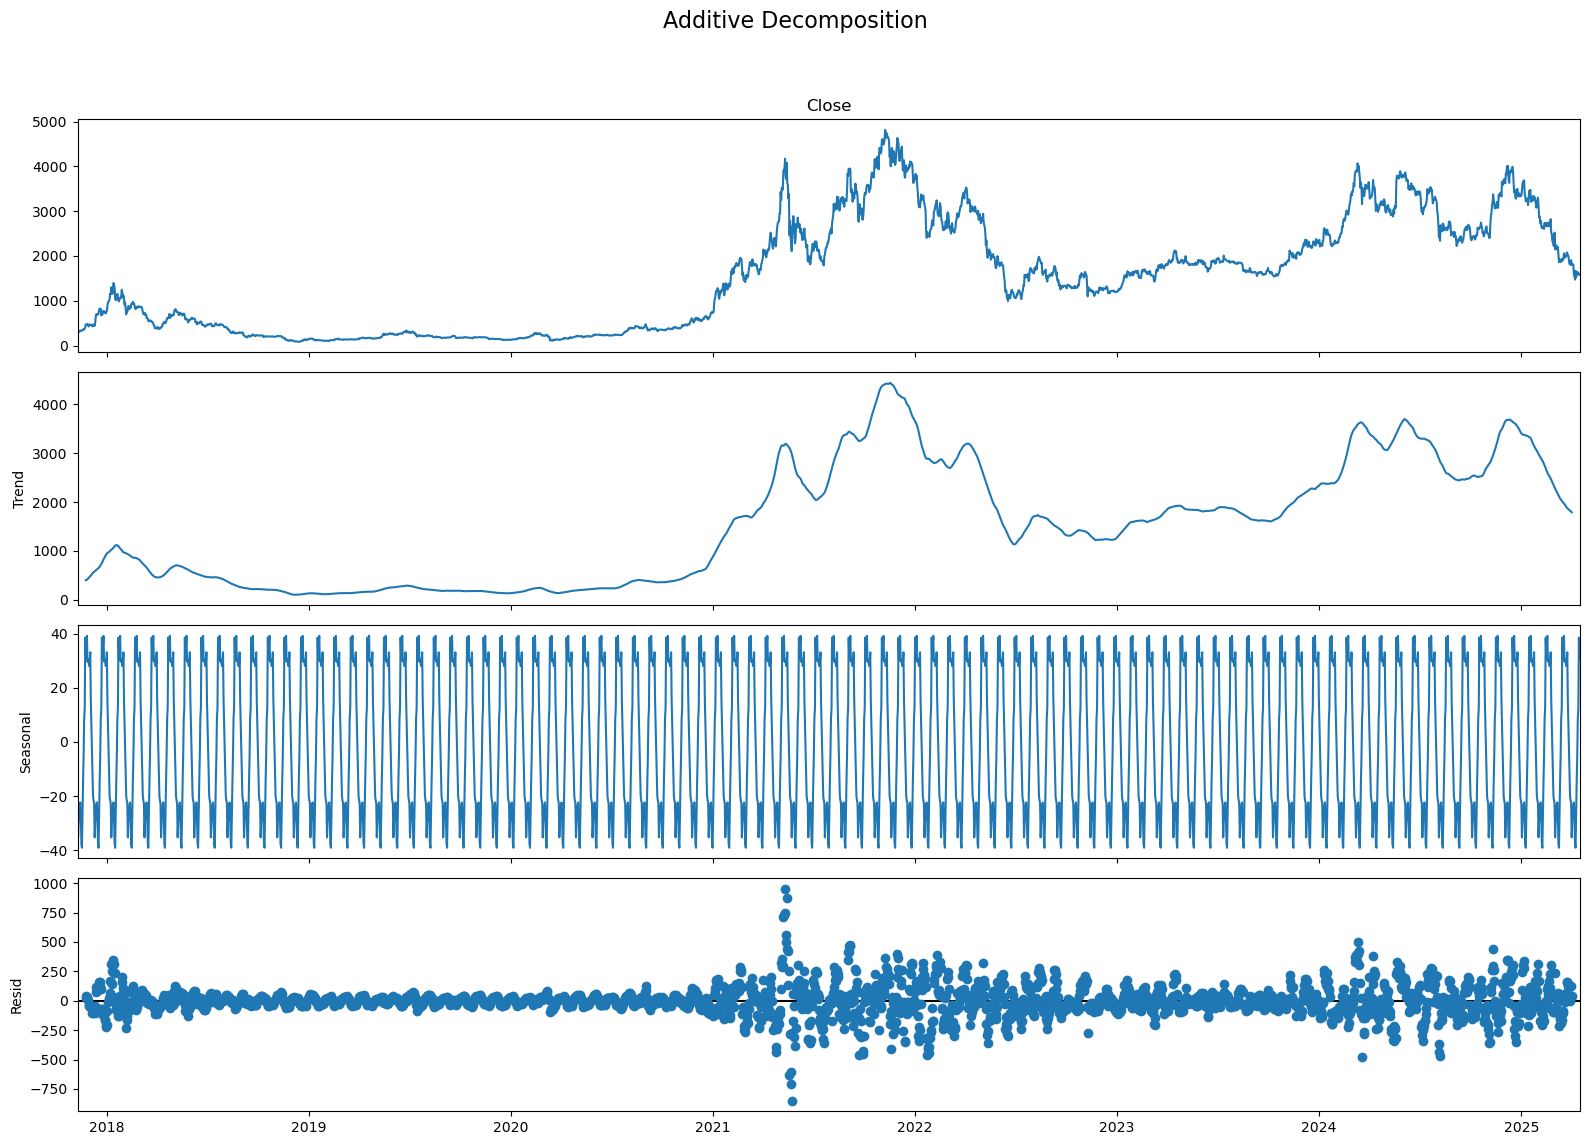

In [14]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df["Close"], model="multiplicative", period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Close'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

- **Price Trend**

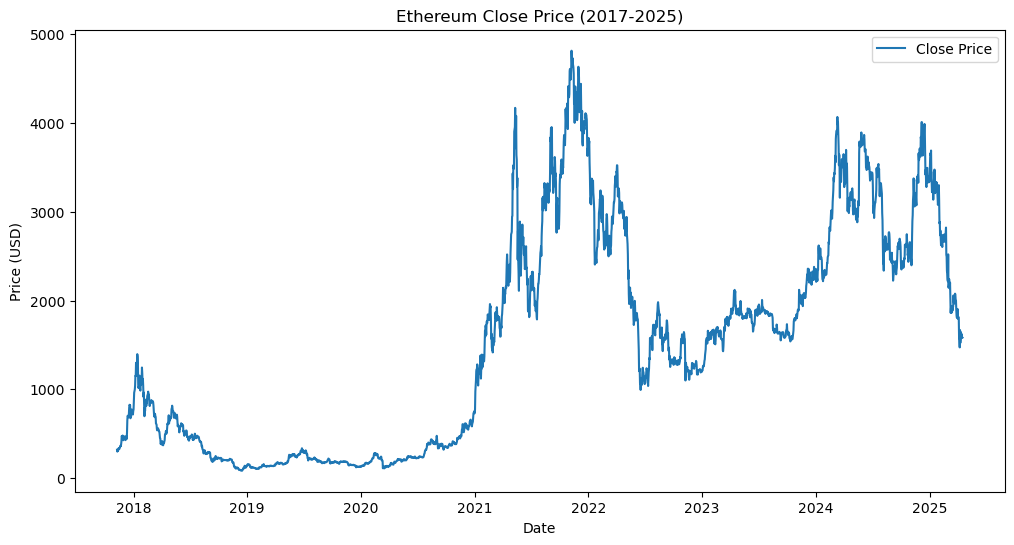

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Close Price")
plt.title("Ethereum Close Price (2017-2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

- **Volume vs. Price**

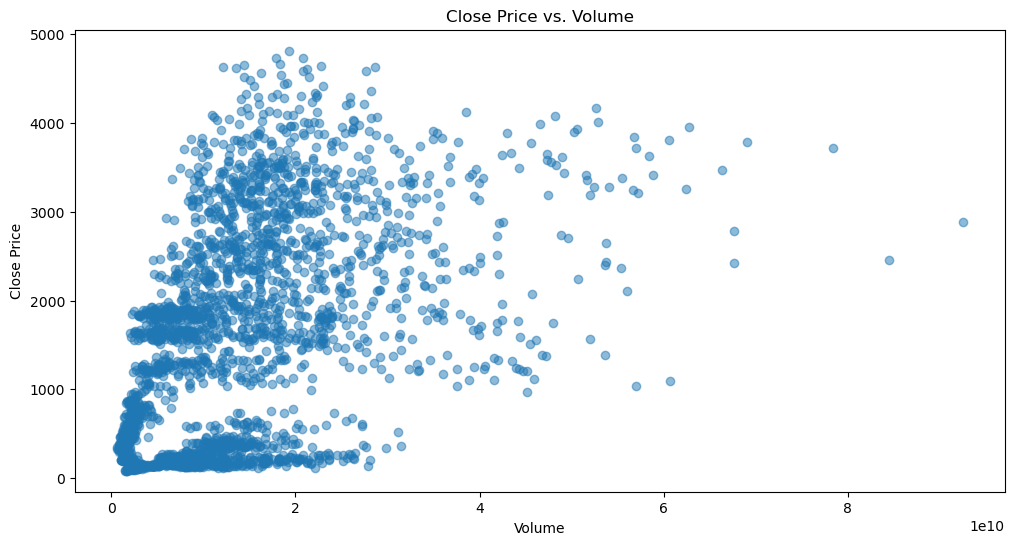

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(df["Volume"], df["Close"], alpha=0.5)
plt.title("Close Price vs. Volume")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()

- **Volatility**

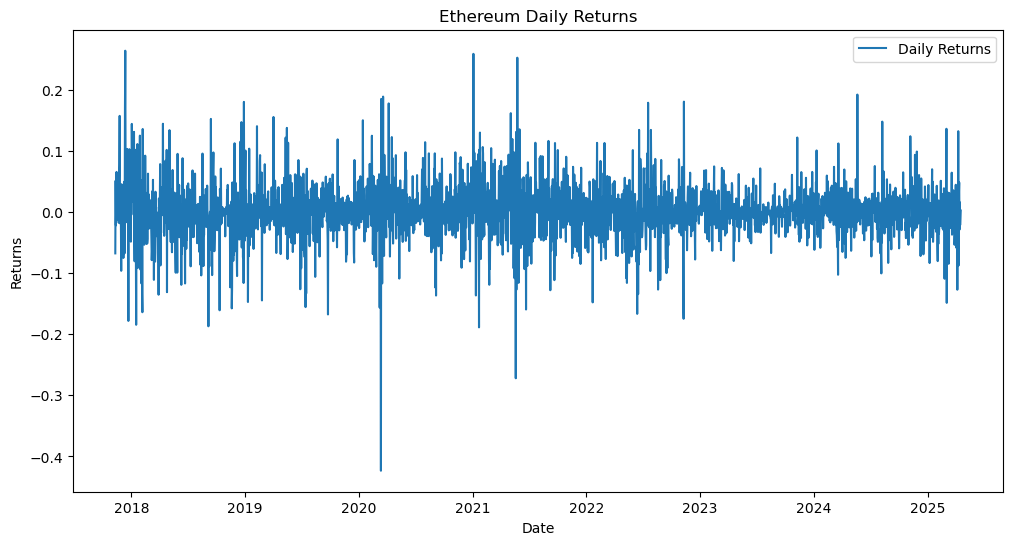

In [17]:
df["Returns"] = df["Close"].pct_change().dropna()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Returns"], label="Daily Returns")
plt.title("Ethereum Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()

- **Rolling Statistics**

<Axes: xlabel='Date'>

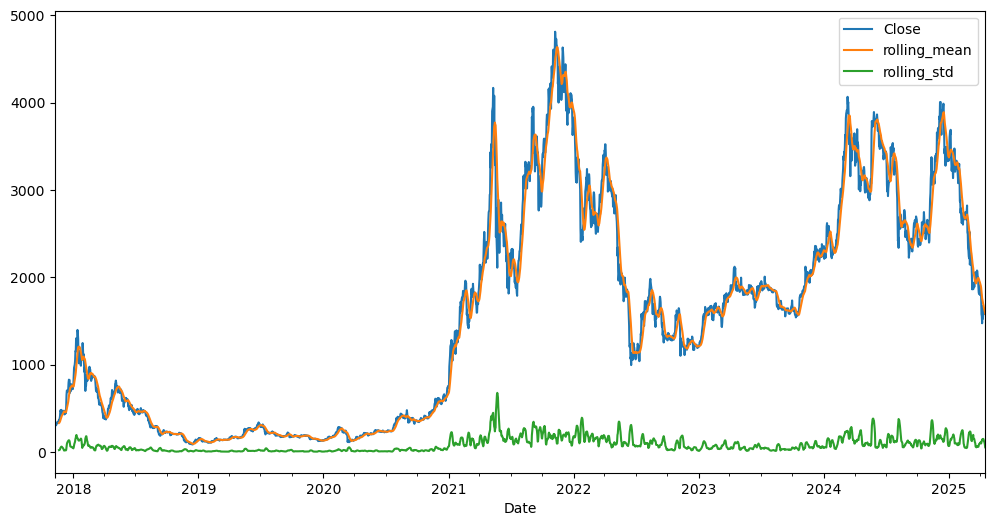

In [19]:
df_rolling= pd.DataFrame()
df_rolling['rolling_mean'] = df['Close'].rolling(window=12).mean()
df_rolling['rolling_std'] = df['Close'].rolling(window=12).std()
df_rolling['Close'] = df['Close']
df_rolling[['Close', 'rolling_mean', 'rolling_std']].plot(figsize=(12, 6))


- **Checking Stationarity**

In [20]:
adf_result = adfuller(df['Close'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'Critical Values: {adf_result[4]}')
print(f"Report: {adf_result}")

ADF Statistic: -1.7330220659028381
p-value: 0.41418381751910793
Critical Values: {'1%': np.float64(-3.4327751686716304), '5%': np.float64(-2.8626114613655744), '10%': np.float64(-2.5673403744927143)}
Report: (np.float64(-1.7330220659028381), np.float64(0.41418381751910793), 17, 2699, {'1%': np.float64(-3.4327751686716304), '5%': np.float64(-2.8626114613655744), '10%': np.float64(-2.5673403744927143)}, np.float64(31220.01597610591))


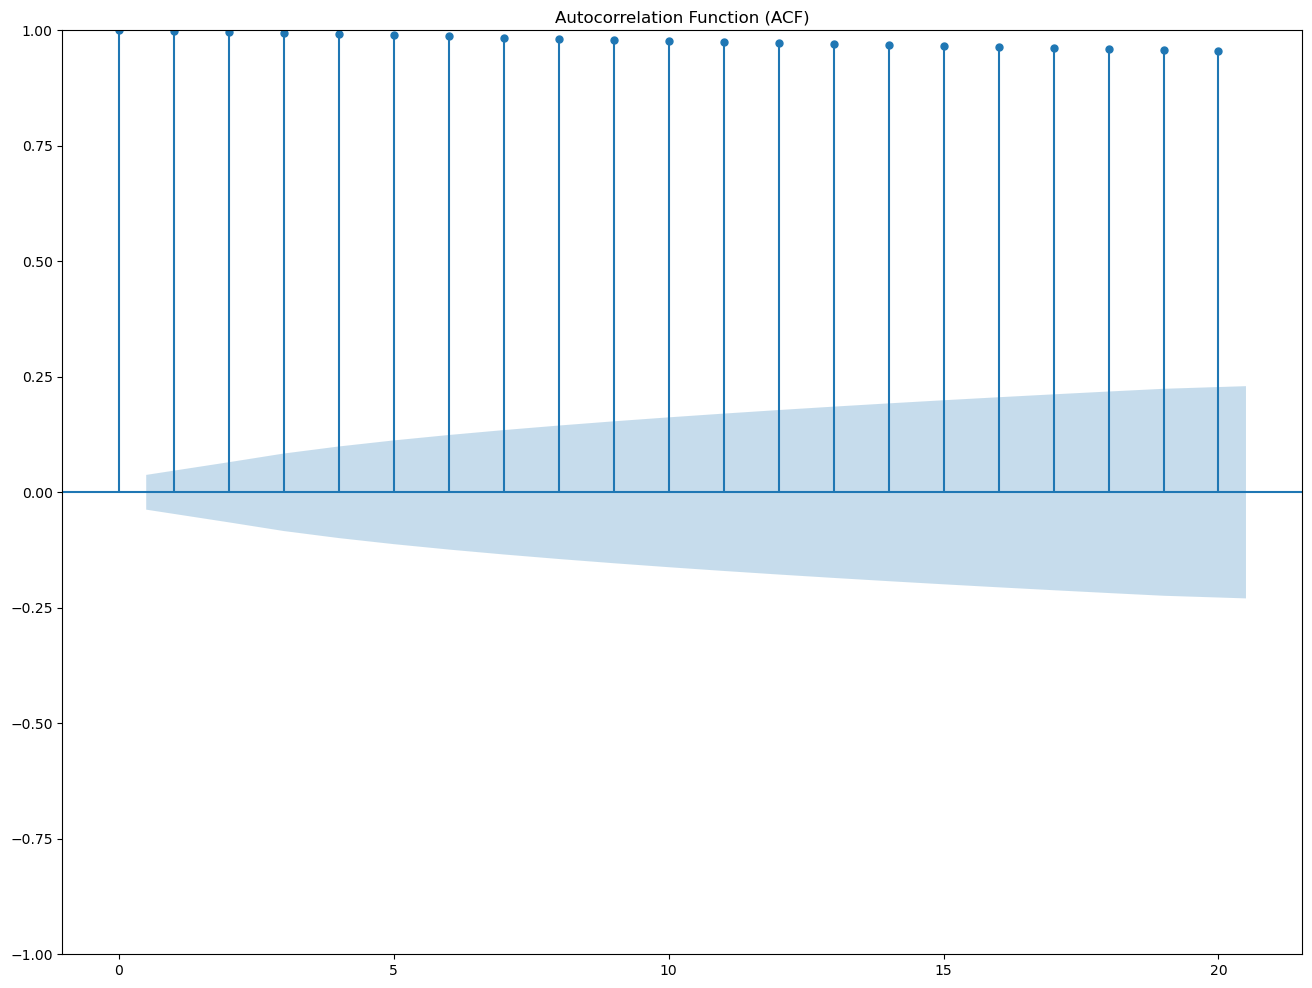

In [88]:
# Plot ACF
plot_acf(df["Close"], lags=20, title="Autocorrelation Function (ACF)")
plt.show()

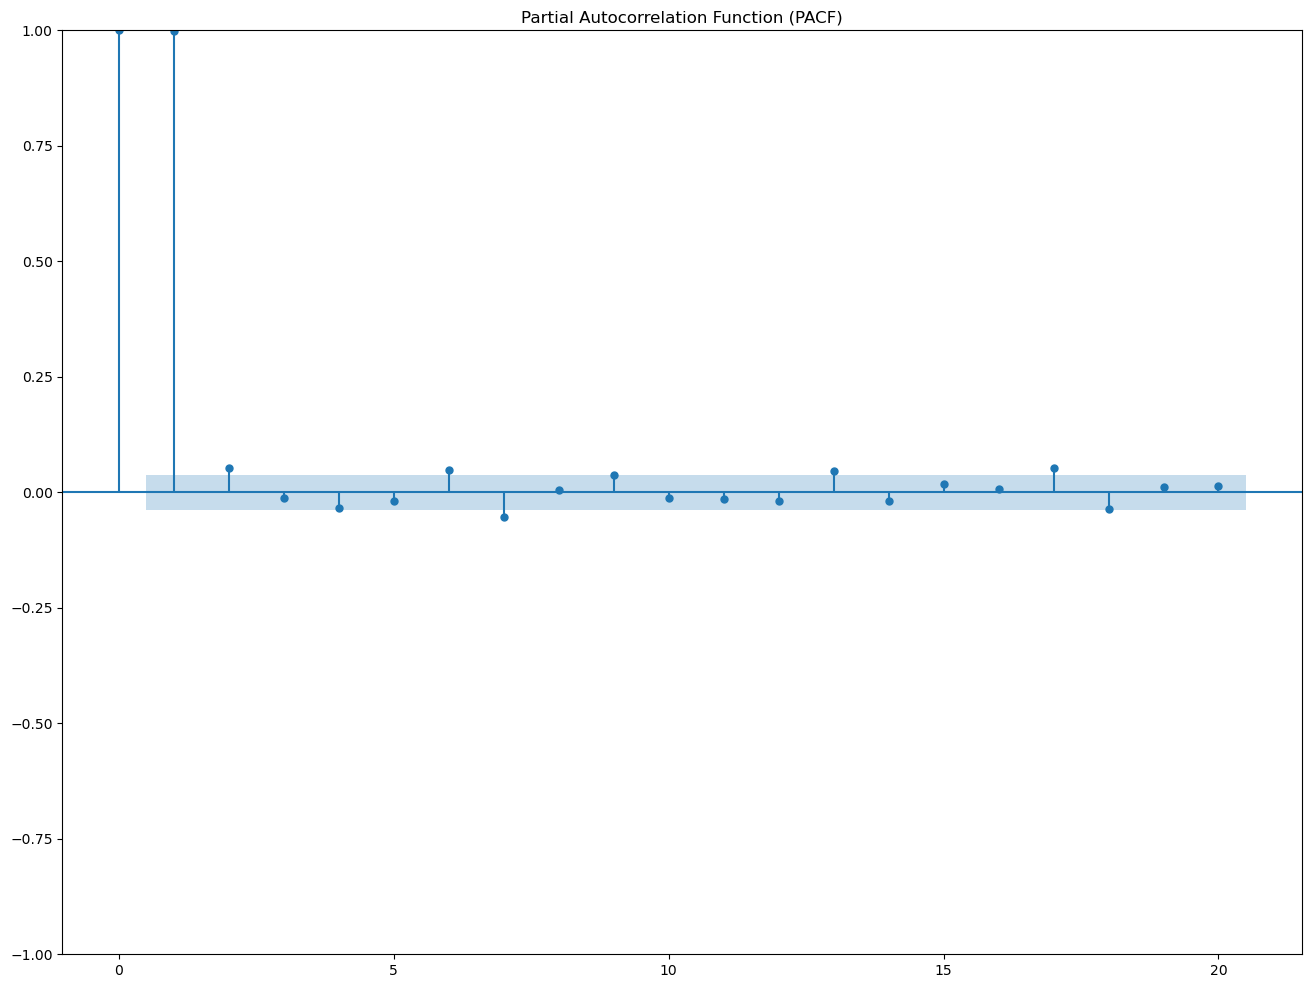

In [89]:
# Plot PACF
plot_pacf(df["Close"], lags=20, title="Partial Autocorrelation Function (PACF)")
plt.show()

- ACF shows slow decay, confirming non-stationarity.
- PACF has a significant spike at lag 1, suggesting an AR(1) component for ARIMA.

- **Making the dataset stationary**

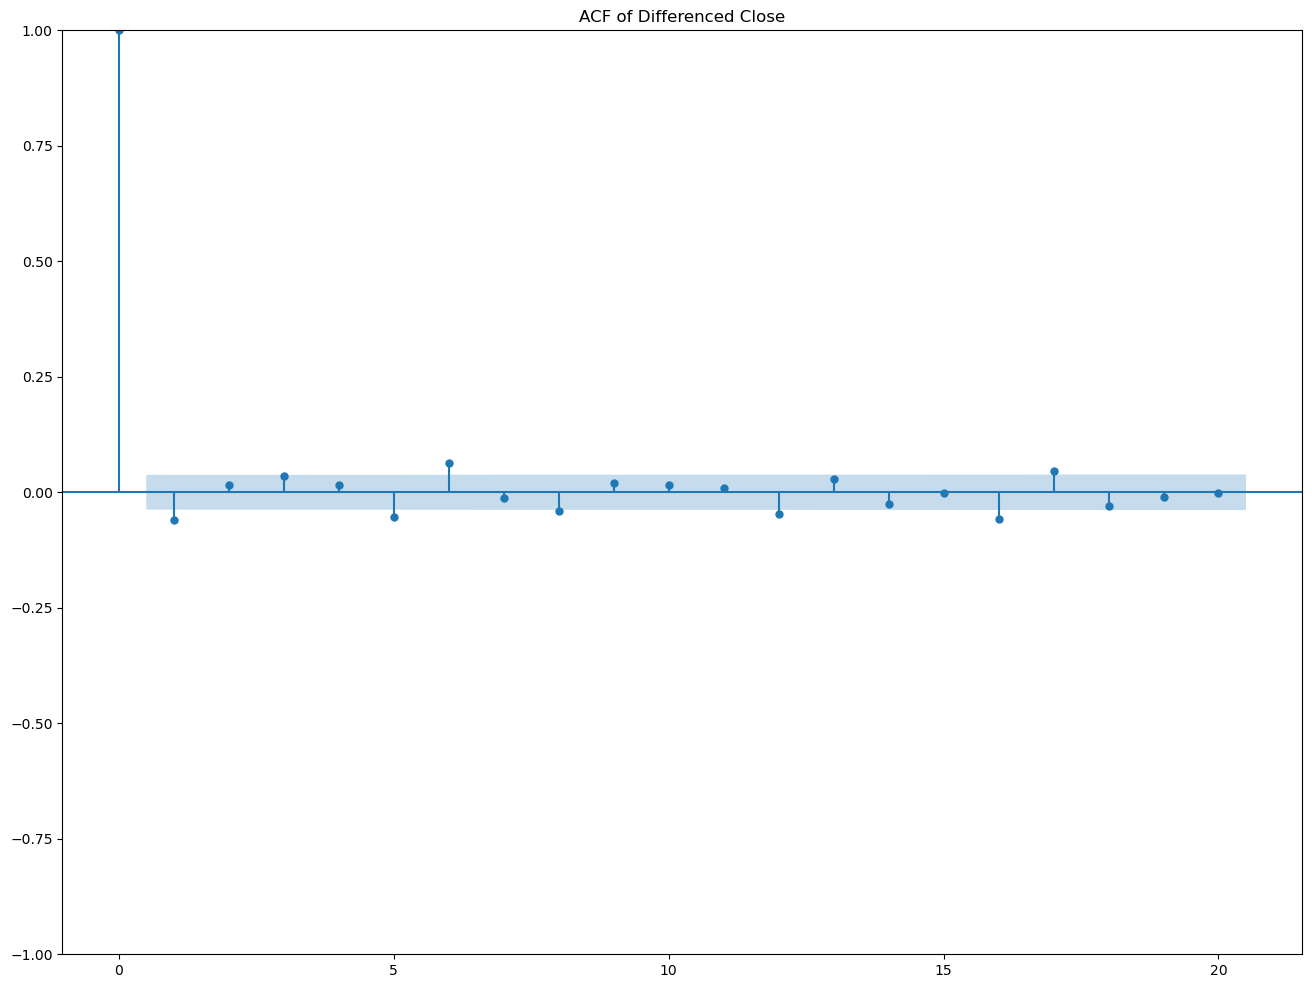

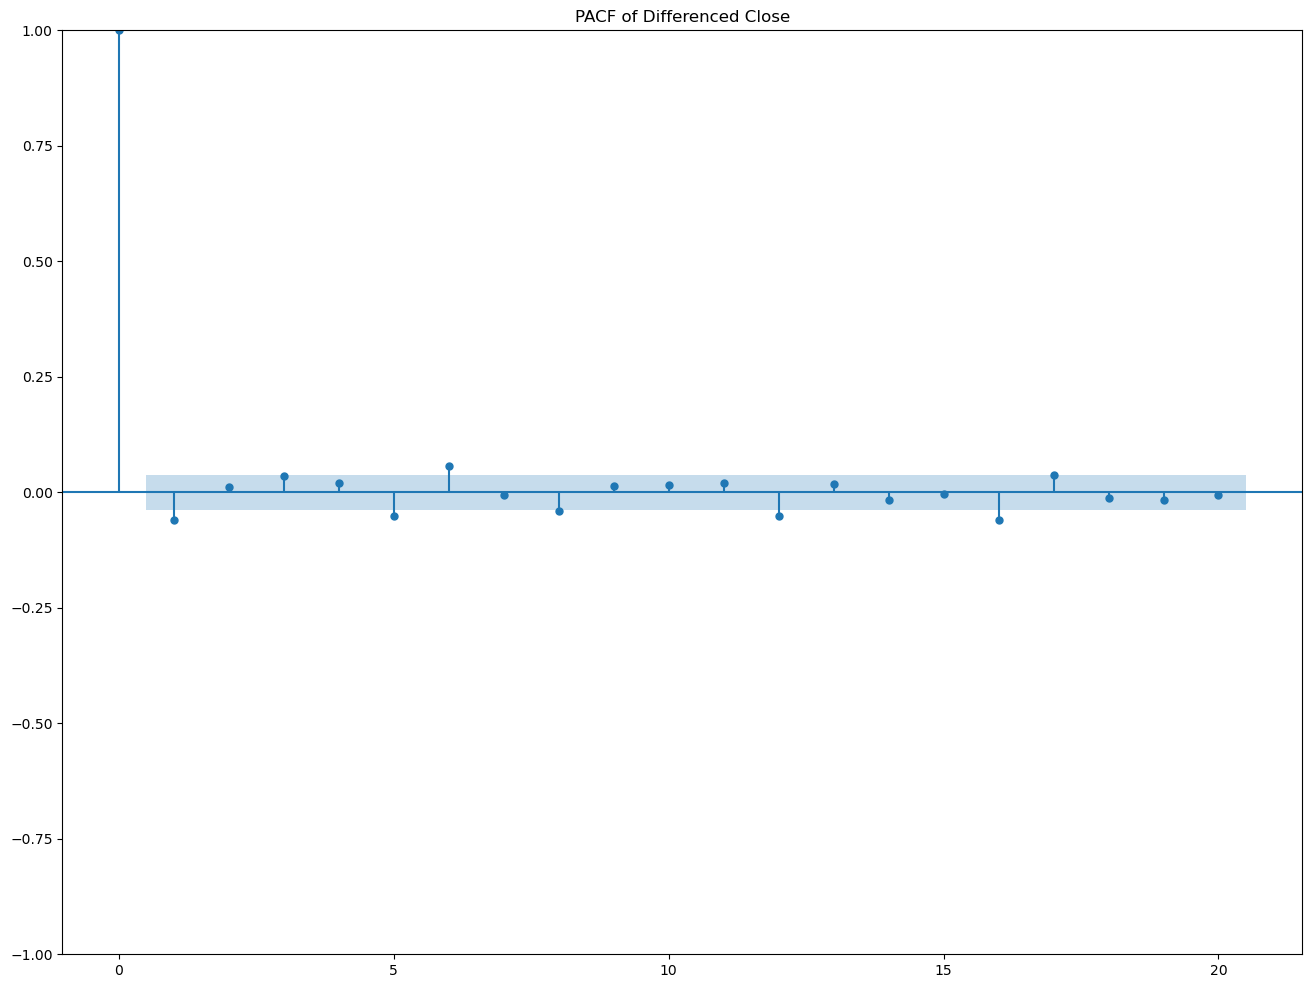

In [21]:
diff_close = df["Close"].diff().dropna()
plot_acf(diff_close, lags=20, title="ACF of Differenced Close")
plot_pacf(diff_close, lags=20, title="PACF of Differenced Close")
plt.show()

## **Conclusion and Final Summary**
The exploratory data analysis (EDA) conducted on the Ethereum (ETH) price dataset from November 9, 2017, to April 17, 2025, provides comprehensive insights into its price behavior, trends, and statistical properties. Below is a summary of the key findings and conclusions:
Key Findings

**Dataset Overview:**

- The dataset contains 2,717 rows and 6 columns: Date, Open, High, Low, Close, and Volume.

- The data spans from November 9, 2017, to April 17, 2025, capturing daily Ethereum price movements in USD.

- No duplicates were found, and missing values were handled using forward-fill during data collection.


**Price Trends and Growth:**

Ethereum's closing price increased significantly, growing over 50 times from approximately $320 in November 2017 to around $1,582 in April 2025.
The price exhibited periods of high volatility, with notable peaks (e.g., max close price of ~$4,812) and troughs (e.g., min close price of ~$84.31).


**Seasonal Decomposition:**

- Both multiplicative and additive decomposition analyses were performed on the closing price with a period of 30 days.

- The decompositions revealed trends, seasonal patterns, and residuals, indicating cyclical behavior in Ethereum prices, though the exact periodicity requires further investigation.


**Volatility and Returns:**

- Daily returns were calculated using percentage changes in the closing price, showing significant volatility, especially during market events.

- A scatter plot of volume vs. closing price indicated no clear linear relationship, suggesting that trading volume alone does not directly predict price movements.


**Stationarity Analysis:**

- The Augmented Dickey-Fuller (ADF) test yielded a p-value of 0.414, indicating that the closing price series is non-stationary (failed to reject the null hypothesis of a unit root).

- After differencing the closing price once, the ACF and PACF plots of the differenced series showed reduced autocorrelation, suggesting that differencing helps achieve stationarity.


**Autocorrelation and Model Implications:**

- The ACF plot of the original closing price showed slow decay, confirming non-stationarity.

- The PACF plot indicated a significant spike at lag 1, suggesting an AR(1) component, which could be used in an ARIMA model.

- The ACF and PACF of the differenced series showed no significant lags beyond the first, supporting the use of a low-order ARIMA model (e.g., ARIMA(1,1,0)).


**Rolling Statistics:**

- Rolling mean and standard deviation (window = 12) highlighted periods of stability and volatility in the closing price.

- The rolling mean tracked the overall trend, while the rolling standard deviation underscored periods of heightened price fluctuations.



**Conclusions**

- `Price Behavior:` Ethereum's price has shown remarkable growth over the analyzed period, driven by market adoption, technological developments, and macroeconomic factors. However, it remains highly volatile, with significant daily returns fluctuations.

- `Non-Stationarity:` The price series is non-stationary, requiring differencing or other transformations for time series modeling. The significant AR(1) component suggests that simple ARIMA models could be effective for short-term forecasting.

- `Seasonality and Trends:` Seasonal decomposition revealed cyclical patterns, which could be explored further to identify specific market cycles or external influences (e.g., regulatory news, network upgrades).

- `Data Quality:` The dataset is clean, with no duplicates or missing values (after forward-fill), making it reliable for further analysis or modeling.

**Recommendations for Further Analysis**

- `Advanced Modeling:` Develop ARIMA, SARIMA, or machine learning models (e.g., LSTM) to forecast Ethereum prices, incorporating the identified AR(1) component and differencing.
External Factors: Include exogenous variables (e.g., Bitcoin prices, market sentiment, or network activity metrics) to improve predictive accuracy.

- `Seasonality Exploration:` Investigate longer or shorter periodicity in seasonal decomposition to better capture market cycles.
Volatility Modeling: Apply GARCH models to analyze and forecast volatility, given the observed fluctuations in daily returns.

This EDA provides a solid foundation for understanding Ethereum's price dynamics and sets the stage for more advanced time series analysis and predictive modeling.
